# Reading licel files

In [1]:
# Import plotting library
from matplotlib import pyplot as plt

import glob

# Import the module for licel files
from atmospheric_lidar import licel
import atmospheric_lidar

print(atmospheric_lidar.__version__)


0.5.5


In [2]:
# Read the file
licel_file = licel.LicelFile('./sample_data/measurement_1/a24C0506.105499')

# The licel file object has several properties describing the file
print("Start time: {}, Stop times: {}".format(licel_file.start_time, licel_file.stop_time))


Start time: 2024-12-05 06:10:14+00:00, Stop times: 2024-12-05 06:10:54+00:00


In [3]:
# See available channel
# Note that the channels have a semi-descriptive name.
# This does not work always and you might need to set "use_id_as_name=True" when reading the file.
print("Available channels: ", licel_file.channels.keys())

Available channels:  odict_keys(['00355.o_an', '00355.o_std_an', '00355.o_ph', '00355.o_std_ph', '00395.s_an', '00395.s_std_an', '00395.s_ph', '00395.s_std_ph', '00353.o_an', '00353.o_std_an', '00353.o_ph', '00353.o_std_ph', '00371.o_an', '00371.o_std_an', '00371.o_ph', '00371.o_std_ph', '00395.p_an', '00395.p_std_an', '00395.p_ph', '00395.p_std_ph', '00460.o_an', '00460.o_std_an', '00460.o_ph', '00460.o_std_ph', '00532.o_an', '00532.o_std_an', '00532.o_ph', '00532.o_std_ph', '00530.o_an', '00530.o_std_an', '00530.o_ph', '00530.o_std_ph'])


In [4]:
# Get one channel of interest
channel = licel_file.channels['00355.o_an']

# The channel object has several properties describing the channel data. E.g.
print("Channel name: ", channel.channel_name)
print('Channel id: ', channel.id)
print("Wavelength: ", channel.wavelength)
print("Number of shots: ", channel.number_of_shots)
print("Is analog?: ", channel.is_analog)
print("ADC bits: ", channel.adcbits)

Channel name:  00355.o_an
Channel id:  BT0
Wavelength:  355
Number of shots:  4094
Is analog?:  True
ADC bits:  16


In [5]:
# Data are stored in the .data property, already converted in physical quantities
channel.data

array([5.19810471, 5.19452849, 5.21041927, ..., 5.20033355, 5.20016583,
       5.19995338], shape=(16380,))

Text(0.5, 0, 'Range (m)')

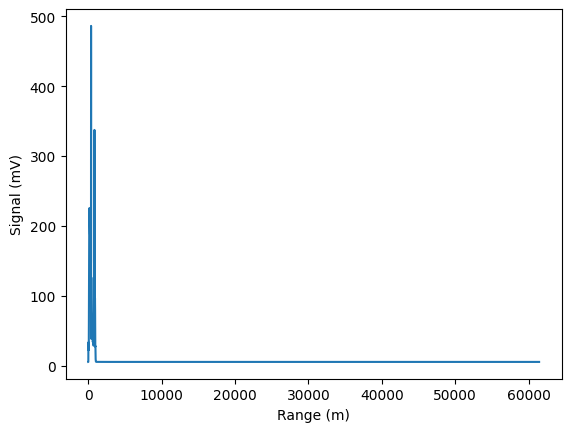

In [6]:
plt.plot(channel.z, channel.data)
plt.ylabel('Signal (mV)')
plt.xlabel('Range (m)')

# Reading a measurement (multiple files)

In [7]:
# Find files in directory
files = glob.glob('./sample_data/measurement_1/*')
print(files)


['./sample_data/measurement_1\\a24C0506.105499', './sample_data/measurement_1\\a24C0506.113644', './sample_data/measurement_1\\a24C0506.121789']


In [8]:
# Read all files
measurements = licel.LicelLidarMeasurement(files)

In [9]:
# Print available channels
print("Available channels: ", measurements.channels.keys())

Available channels:  odict_keys(['00355.o_an', '00355.o_std_an', '00355.o_ph', '00355.o_std_ph', '00395.s_an', '00395.s_std_an', '00395.s_ph', '00395.s_std_ph', '00353.o_an', '00353.o_std_an', '00353.o_ph', '00353.o_std_ph', '00371.o_an', '00371.o_std_an', '00371.o_ph', '00371.o_std_ph', '00395.p_an', '00395.p_std_an', '00395.p_ph', '00395.p_std_ph', '00460.o_an', '00460.o_std_an', '00460.o_ph', '00460.o_std_ph', '00532.o_an', '00532.o_std_an', '00532.o_ph', '00532.o_std_ph', '00530.o_an', '00530.o_std_an', '00530.o_ph', '00530.o_std_ph'])


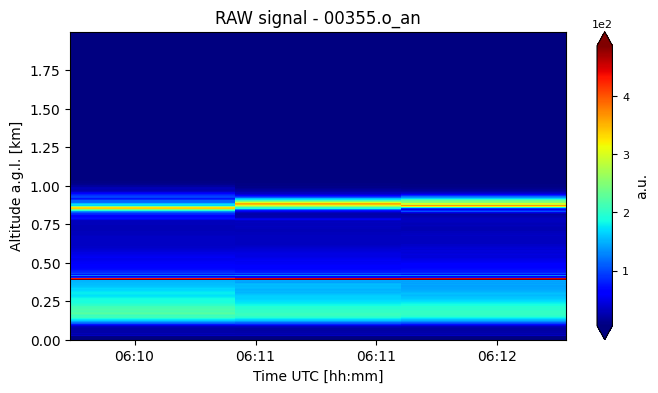

In [10]:
# Plot a single channel
measurements.channels['00355.o_an'].plot(signal_type='raw', zoom=[0, 2000, 0, None])

In [11]:
# Subset by channels
subset_channels = measurements.subset_by_channels(['00355.o_an', '00395.s_an', '00353.o_an'])
print("Available channels: ", subset_channels.channels.keys())

Available channels:  dict_keys(['00355.o_an', '00395.s_an', '00353.o_an'])


In [12]:
# Subset by bins
subset_bins = subset_channels.subset_by_bins(5, 200)

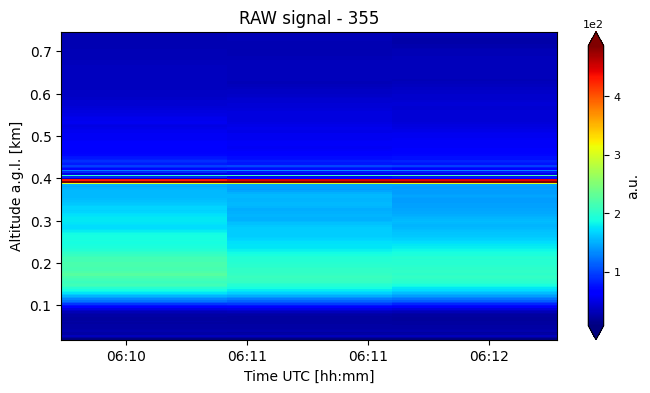

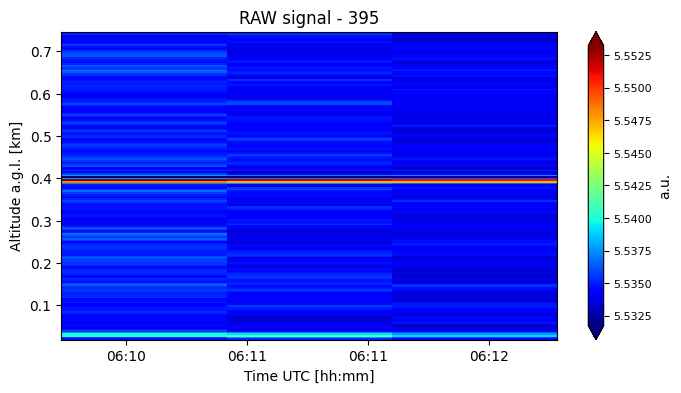

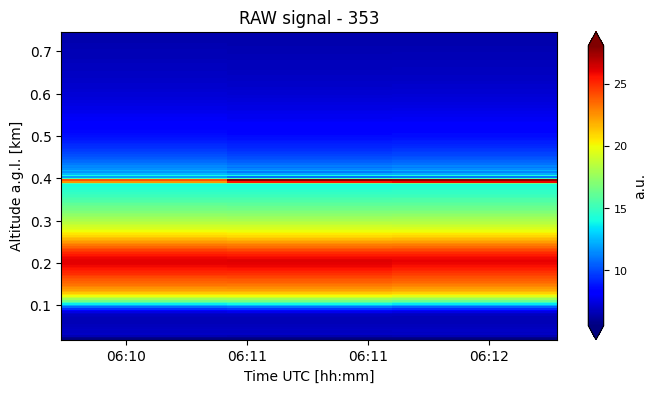

In [13]:
# Plot all channels
subset_bins.plot(signal_type='raw')

In [24]:
# Getting matrix of data
data = subset_bins.channels['00355.o_an'].matrix
print(data)
print(data.shape)

[[215.79710182 217.48664901 218.83252157 217.33830776 214.74901313
  213.58021827 213.80827989 211.42236186 206.26570884 202.36285619
  199.44660142 196.26960522 194.12558592 192.64052976 190.56127744
  187.77142954 187.91617221 189.5616941  188.18697512 187.43471914
  187.49564527 185.29505317 182.35439664 179.05937411 174.64908256
  171.65225017 171.34795307 172.56520669 174.75905263 176.24102456
  176.53071676 176.31586608 175.08296208 173.51830667 171.64985733
  167.14822224 164.93452355 167.46676644 166.92910954 163.15394031
  161.76766153 160.73827389 158.03205617 155.65916272 154.83199627
  154.88843862 154.64789658 154.32647687 153.84342671 152.6184243
  150.21912947 147.3825783  151.12009197 301.76101189 486.21237979
  432.40622476  38.44875643  82.63038963 205.16579017  52.41976816
   85.06747421 126.07821072  71.21535351  83.98783878  96.8699102
   79.13616493  84.44101011  88.5273307   80.66473018  78.28003839
   75.63777512  70.45276582  68.259738    67.42743737  66.174626

Text(0.5, 0, 'Range (m)')

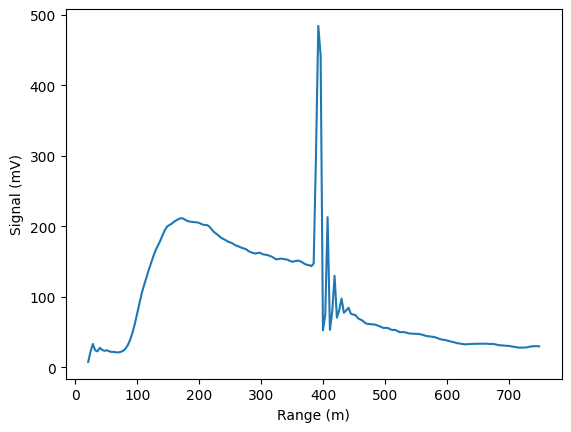

In [30]:
# Average of data
channel = subset_bins.channels['00355.o_an']
plt.plot(channel.z, channel.average_profile())
plt.ylabel('Signal (mV)')
plt.xlabel('Range (m)')